# INFORME FINAL:
#🎯 Challenge #2: TelecomX - Análisis y Evasión de Clientes - Parte 2

##🛠️ Preparación de los datos

###Extracción del Archivo Tratado

In [414]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [415]:
# Extraer el archivo de la parte 1 de Challenge
import pandas as pd

url_df = '/content/drive/MyDrive/TelecomX_data_cleaned.csv'

datos_telecom_2 = pd.read_csv(url_df, sep=',')
datos_telecom_2

customer_id  churn  gender  senior_citizen  partner  dependents  tenure  \
0     0002-ORFBO      0  Female               0        1           1       9   
1     0003-MKNFE      0    Male               0        0           0       9   
2     0004-TLHLJ      1    Male               0        0           0       4   
3     0011-IGKFF      1    Male               1        1           0      13   
4     0013-EXCHZ      1  Female               1        1           0       3   
...          ...    ...     ...             ...      ...         ...     ...   
7262  9987-LUTYD      0  Female               0        0           0      13   
7263  9992-RRAMN      1    Male               0        1           0      22   
7264  9992-UJOEL      0    Male               0        0           0       2   
7265  9993-LHIEB      0    Male               0        1           1      67   
7266  9995-HOTOH      0    Male               0        1           1      63   

      phone_service  multiple_lines        contract  ...  monthly_charges  \
0                 1               0        one year  ...            65.60   
1                 1               1  month to month  ...            59.90   
2                 1               0  month to month  ...            73.90   
3                 1               0  month to month  ...            98.00   
4                 1               0  month to month  ...            83.90   
...             ...             ...             ...  ...              ...   
7262              1               0        one year  ...            55.15   
7263              1               1  month to month  ...            85.10   
7264              1               0  month to month  ...            50.30   
7265              1               0        two year  ...            67.85   
7266              0               0        two year  ...            59.00   

     total_charges  internet_service  online_security online_backup  \
0           593.30               dsl                0             1   
1           542.40               dsl                0             0   
2           280.85       fiber optic                0             0   
3          1237.85       fiber optic                0             1   
4           267.40       fiber optic                0             0   
...            ...               ...              ...           ...   
7262        742.90               dsl                1             0   
7263       1873.70       fiber optic                0             0   
7264         92.75               dsl                0             1   
7265       4627.65               dsl                1             0   
7266       3707.60               dsl                1             1   

      device_protection  tech_support  streaming_tv  streaming_movies  \
0                     0             1             1                 0   
1                     0             0             0                 1   
2                     1             0             0                 0   
3                     1             0             1                 1   
4                     0             1             1                 0   
...                 ...           ...           ...               ...   
7262                  0             1             0                 0   
7263                  0             0             0                 1   
7264                  0             0             0                 0   
7265                  1             1             0                 1   
7266                  1             0             1                 1   

      Cuentas_diarias  
0            7.288889  
1            6.655556  
2           18.475000  
3            7.538462  
4           27.966667  
...               ...  
7262         4.242308  
7263         3.868182  
7264        25.150000  
7265         1.012687  
7266         0.936508  

[7267 rows x 22 columns]

Antes de seguir, vamos a cambiar la variable "gender" de string a binario (0,1):

In [416]:
#variable 'gender' de string a binario
datos_telecom_2['gender'] = datos_telecom_2['gender'].map({'Female': 0, 'Male': 1})

In [417]:
#utilizamos la funcion 'info' para revisar que el cambio se aplicó correctamente al data frame
datos_telecom_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   int64  
 2   gender             7267 non-null   int64  
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   int64  
 5   dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   int64  
 8   multiple_lines     7267 non-null   int64  
 9   contract           7267 non-null   object 
 10  paperless_billing  7267 non-null   int64  
 11  payment_method     7267 non-null   object 
 12  monthly_charges    7267 non-null   float64
 13  total_charges      7267 non-null   float64
 14  internet_service   7267 non-null   object 
 15  online_security    7267 non-null   int64  
 16  online_backup      7267 

###Eliminación de Columnas Irrelevantes

In [418]:
#eliminar columna 'customer_id' del dataframe 'datos_telecom_2'
datos_telecom_2 = datos_telecom_2.drop('customer_id', axis=1)
datos_telecom_2 = datos_telecom_2.drop('Cuentas_diarias', axis=1)
datos_telecom_2


churn  gender  senior_citizen  partner  dependents  tenure  \
0         0       0               0        1           1       9   
1         0       1               0        0           0       9   
2         1       1               0        0           0       4   
3         1       1               1        1           0      13   
4         1       0               1        1           0       3   
...     ...     ...             ...      ...         ...     ...   
7262      0       0               0        0           0      13   
7263      1       1               0        1           0      22   
7264      0       1               0        0           0       2   
7265      0       1               0        1           1      67   
7266      0       1               0        1           1      63   

      phone_service  multiple_lines        contract  paperless_billing  \
0                 1               0        one year                  1   
1                 1               1  month to month                  0   
2                 1               0  month to month                  1   
3                 1               0  month to month                  1   
4                 1               0  month to month                  1   
...             ...             ...             ...                ...   
7262              1               0        one year                  0   
7263              1               1  month to month                  1   
7264              1               0  month to month                  1   
7265              1               0        two year                  0   
7266              0               0        two year                  0   

        payment_method  monthly_charges  total_charges internet_service  \
0         mailed check            65.60         593.30              dsl   
1         mailed check            59.90         542.40              dsl   
2     electronic check            73.90         280.85      fiber optic   
3     electronic check            98.00        1237.85      fiber optic   
4         mailed check            83.90         267.40      fiber optic   
...                ...              ...            ...              ...   
7262      mailed check            55.15         742.90              dsl   
7263  electronic check            85.10        1873.70      fiber optic   
7264      mailed check            50.30          92.75              dsl   
7265      mailed check            67.85        4627.65              dsl   
7266  electronic check            59.00        3707.60              dsl   

      online_security  online_backup  device_protection  tech_support  \
0                   0              1                  0             1   
1                   0              0                  0             0   
2                   0              0                  1             0   
3                   0              1                  1             0   
4                   0              0                  0             1   
...               ...            ...                ...           ...   
7262                1              0                  0             1   
7263                0              0                  0             0   
7264                0              1                  0             0   
7265                1              0                  1             1   
7266                1              1                  1             0   

      streaming_tv  streaming_movies  
0                1                 0  
1                0                 1  
2                0                 0  
3                1                 1  
4                1                 0  
...            ...               ...  
7262             0                 0  
7263             0                 1  
7264             0                 0  
7265             0                 1  
7266             1                 1  

[7267 rows x 20 columns]

In [419]:
#utilizamos la funcion 'value_count' para revisar que el cambio se aplicó correctamente al data frame
datos_telecom_2['payment_method'].value_counts()

payment_method
electronic check             2445
mailed check                 1665
bank transfer (automatic)    1589
credit card (automatic)      1568
Name: count, dtype: int64

In [420]:
#Se llama a la variable 'datos_telecom_2' para revisar que el cambio se aplicó correctamente al data frame
datos_telecom_2

churn  gender  senior_citizen  partner  dependents  tenure  \
0         0       0               0        1           1       9   
1         0       1               0        0           0       9   
2         1       1               0        0           0       4   
3         1       1               1        1           0      13   
4         1       0               1        1           0       3   
...     ...     ...             ...      ...         ...     ...   
7262      0       0               0        0           0      13   
7263      1       1               0        1           0      22   
7264      0       1               0        0           0       2   
7265      0       1               0        1           1      67   
7266      0       1               0        1           1      63   

      phone_service  multiple_lines        contract  paperless_billing  \
0                 1               0        one year                  1   
1                 1               1  month to month                  0   
2                 1               0  month to month                  1   
3                 1               0  month to month                  1   
4                 1               0  month to month                  1   
...             ...             ...             ...                ...   
7262              1               0        one year                  0   
7263              1               1  month to month                  1   
7264              1               0  month to month                  1   
7265              1               0        two year                  0   
7266              0               0        two year                  0   

        payment_method  monthly_charges  total_charges internet_service  \
0         mailed check            65.60         593.30              dsl   
1         mailed check            59.90         542.40              dsl   
2     electronic check            73.90         280.85      fiber optic   
3     electronic check            98.00        1237.85      fiber optic   
4         mailed check            83.90         267.40      fiber optic   
...                ...              ...            ...              ...   
7262      mailed check            55.15         742.90              dsl   
7263  electronic check            85.10        1873.70      fiber optic   
7264      mailed check            50.30          92.75              dsl   
7265      mailed check            67.85        4627.65              dsl   
7266  electronic check            59.00        3707.60              dsl   

      online_security  online_backup  device_protection  tech_support  \
0                   0              1                  0             1   
1                   0              0                  0             0   
2                   0              0                  1             0   
3                   0              1                  1             0   
4                   0              0                  0             1   
...               ...            ...                ...           ...   
7262                1              0                  0             1   
7263                0              0                  0             0   
7264                0              1                  0             0   
7265                1              0                  1             1   
7266                1              1                  1             0   

      streaming_tv  streaming_movies  
0                1                 0  
1                0                 1  
2                0                 0  
3                1                 1  
4                1                 0  
...            ...               ...  
7262             0                 0  
7263             0                 1  
7264             0                 0  
7265             0                 1  
7266             1                 1  

[7267 rows x 20 columns]

###Encoding

In [421]:
#definir variables explicativas
X = datos_telecom_2.drop('churn', axis=1)
y = datos_telecom_2['churn']

One hot encoder

In [422]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [423]:
columnas = X.columns

In [424]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                  ['contract', 'payment_method', 'internet_service']),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [425]:
#Colocar en nuestras variables explicativas (X) toda la transformación
X = one_hot.fit_transform(X)

In [426]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__contract_month to month',
       'onehotencoder__contract_one year',
       'onehotencoder__contract_two year',
       'onehotencoder__payment_method_bank transfer (automatic)',
       'onehotencoder__payment_method_credit card (automatic)',
       'onehotencoder__payment_method_electronic check',
       'onehotencoder__payment_method_mailed check',
       'onehotencoder__internet_service_dsl',
       'onehotencoder__internet_service_fiber optic',
       'onehotencoder__internet_service_no', 'remainder__gender',
       'remainder__senior_citizen', 'remainder__partner',
       'remainder__dependents', 'remainder__tenure',
       'remainder__phone_service', 'remainder__multiple_lines',
       'remainder__paperless_billing', 'remainder__monthly_charges',
       'remainder__total_charges', 'remainder__online_security',
       'remainder__online_backup', 'remainder__device_protection',
       'remainder__tech_support', 'remainder__streaming_tv',
       'remainder__str

In [427]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

onehotencoder__contract_month to month  \
0                                        0.0   
1                                        1.0   
2                                        1.0   
3                                        1.0   
4                                        1.0   
...                                      ...   
7262                                     0.0   
7263                                     1.0   
7264                                     1.0   
7265                                     0.0   
7266                                     0.0   

      onehotencoder__contract_one year  onehotencoder__contract_two year  \
0                                  1.0                               0.0   
1                                  0.0                               0.0   
2                                  0.0                               0.0   
3                                  0.0                               0.0   
4                                  0.0                               0.0   
...                                ...                               ...   
7262                               1.0                               0.0   
7263                               0.0                               0.0   
7264                               0.0                               0.0   
7265                               0.0                               1.0   
7266                               0.0                               1.0   

      onehotencoder__payment_method_bank transfer (automatic)  \
0                                                   0.0         
1                                                   0.0         
2                                                   0.0         
3                                                   0.0         
4                                                   0.0         
...                                                 ...         
7262                                                0.0         
7263                                                0.0         
7264                                                0.0         
7265                                                0.0         
7266                                                0.0         

      onehotencoder__payment_method_credit card (automatic)  \
0                                                   0.0       
1                                                   0.0       
2                                                   0.0       
3                                                   0.0       
4                                                   0.0       
...                                                 ...       
7262                                                0.0       
7263                                                0.0       
7264                                                0.0       
7265                                                0.0       
7266                                                0.0       

      onehotencoder__payment_method_electronic check  \
0                                                0.0   
1                                                0.0   
2                                                1.0   
3                                                1.0   
4                                                0.0   
...                                              ...   
7262                                             0.0   
7263                                             1.0   
7264                                             0.0   
7265                                             0.0   
7266                                             1.0   

      onehotencoder__payment_method_mailed check  \
0                                            1.0   
1                                            1.0   
2                                            0.0   
3                                            0.0   
4                                            

In [428]:
# Codificando variable de respuesta
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [429]:
y

array([0, 0, 1, ..., 0, 0, 0])

###Verificación de la Proporción de Cancelación (Churn)

In [430]:
#Estimar la proporción de clientes que cancelaron 'churn' en relación con los que permanecieron del dataframe: 'datos_telecom_2'

import pandas as pd

dist_porcentaje = datos_telecom_2['churn'].value_counts(normalize=True).round(4) * 100
dist_frecuencia = datos_telecom_2['churn'].value_counts()

dist_frec_cualitativa = pd.DataFrame({'Frecuencia': dist_frecuencia, 'Porcentaje (%)': dist_porcentaje})
dist_frec_cualitativa.rename(index={0: 'No cancelaron', 1: 'Si cancelaron'}, inplace=True)
dist_frec_cualitativa

Frecuencia  Porcentaje (%)
churn                                    
No cancelaron        5398           74.28
Si cancelaron        1869           25.72

<p align= 'justify'>Basándonos en el resultado anterior, podemos ver la distribución de la variable «churn»:

* Clientes que no cancelaron (0): 5398  ---> (74.28 %)
* Clientes que si cancelaron (1): 1869  ---> (25.72 %)

<p align= 'justify'>Esto indica que hay un desequilibrio en el conjunto de datos, con un número significativamente mayor de clientes que no cancelaron en comparación con los que sí lo hicieron. Este desequilibrio puede afectar a los modelos predictivos generados posteriormente, lo que podría dar lugar a modelos sesgados con tendencia hacia la clase mayoritaria ('No cancelaron').

<p align= 'justify'>Debemos considerar técnicas para abordar este desequilibrio de clases, como el sobremuestreo de la clase minoritaria, el submuestreo de la clase mayoritaria o el uso de algoritmos menos sensibles a los datos desequilibrados.

###Balanceo de Clases (opcional)

###Evaluar la necesidad de estandarización o normalización

In [431]:
# Evaluar la necesidad de estandarización o normalización del DataFrame
import pandas as pd

# Calcular las medidas descriptivas
display(datos_telecom_2.describe())

churn       gender  senior_citizen      partner   dependents  \
count  7267.000000  7267.000000     7267.000000  7267.000000  7267.000000   
mean      0.257190     0.505711        0.162653     0.484106     0.300124   
std       0.437115     0.500002        0.369074     0.499782     0.458343   
min       0.000000     0.000000        0.000000     0.000000     0.000000   
25%       0.000000     0.000000        0.000000     0.000000     0.000000   
50%       0.000000     1.000000        0.000000     0.000000     0.000000   
75%       1.000000     1.000000        0.000000     1.000000     1.000000   
max       1.000000     1.000000        1.000000     1.000000     1.000000   

            tenure  phone_service  multiple_lines  paperless_billing  \
count  7267.000000    7267.000000     7267.000000        7267.000000   
mean     32.346498       0.902711        0.421770           0.593230   
std      24.571773       0.296371        0.493876           0.491265   
min       0.000000       0.000000        0.000000           0.000000   
25%       9.000000       1.000000        0.000000           0.000000   
50%      29.000000       1.000000        0.000000           1.000000   
75%      55.000000       1.000000        1.000000           1.000000   
max      72.000000       1.000000        1.000000           1.000000   

       monthly_charges  total_charges  online_security  online_backup  \
count      7267.000000    7267.000000      7267.000000    7267.000000   
mean         64.720098    2277.182035         0.285950       0.344571   
std          30.129572    2268.648587         0.451897       0.475261   
min          18.250000       0.000000         0.000000       0.000000   
25%          35.425000     396.200000         0.000000       0.000000   
50%          70.300000    1389.200000         0.000000       0.000000   
75%          89.875000    3778.525000         1.000000       1.000000   
max         118.750000    8684.800000         1.000000       1.000000   

       device_protection  tech_support  streaming_tv  streaming_movies  
count        7267.000000   7267.000000   7267.000000       7267.000000  
mean            0.342782      0.289528      0.383927          0.387505  
std             0.474672      0.453575      0.486374          0.487214  
min             0.000000      0.000000      0.000000          0.000000  
25%             0.000000      0.000000      0.000000          0.000000  
50%             0.000000      0.000000      0.000000          0.000000  
75%             1.000000      1.000000      1.000000          1.000000  
max             1.000000      1.000000      1.000000          1.000000

<p align = 'justify'>Para evaluar la necesidad de normalización o estandarización, es preciso examinar las estadísticas descriptivas de las características numéricas de la base de datos.

<p align = 'justify'>Se observan diversas escalas en cada una de las columnas. Los algoritmos funcionan de mejor forma cuando la información contenida en el DataFrame contiene escalas similares.

<p align = 'justify'>Por lo tanto, basándonos en estas observaciones, es imperativo aplicar la normalización o estandarización a los datos antes de entrenar un modelo.

###Normalización o Estandarización (si es necesario)

In [507]:
# Realizar la normalización
from sklearn.preprocessing import MinMaxScaler
normalizacion = MinMaxScaler()
X_train_norm = normalizacion.fit_transform(X_train)
pd.DataFrame(X_train_norm)
a = pd.DataFrame(X_train_norm)
a

0    1    2    3    4    5    6    7    8    9   ...   16   17  \
0     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  1.0   
1     1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0   
2     1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  1.0   
3     1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
4     1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  1.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5445  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
5446  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  1.0  0.0   
5447  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
5448  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
5449  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0   

            18        19   20   21   22   23   24   25  
0     0.658865  0.661702  0.0  1.0  1.0  0.0  0.0  0.0  
1     0.222610  0.172082  0.0  0.0  0.0  1.0  0.0  1.0  
2     0.559263  0.103255  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.760956  0.305033  1.0  0.0  0.0  0.0  1.0  1.0  
4     0.569223  0.061377  0.0  0.0  0.0  0.0  0.0  0.0  
...        ...       ...  ...  ...  ...  ...  ...  ...  
5445  0.829183  0.104418  0.0  1.0  0.0  1.0  1.0  1.0  
5446  0.070717  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
5447  0.223606  0.051734  1.0  1.0  1.0  0.0  0.0  0.0  
5448  0.372012  0.232182  1.0  1.0  0.0  0.0  0.0  0.0  
5449  0.265936  0.106652  0.0  0.0  0.0  0.0  0.0  0.0  

[5450 rows x 26 columns]

In [433]:
# Visualizar datos normalizados
pd.DataFrame(X_train_norm, columns=one_hot.get_feature_names_out(columnas))


onehotencoder__contract_month to month  \
0                                        0.0   
1                                        1.0   
2                                        1.0   
3                                        1.0   
4                                        1.0   
...                                      ...   
5445                                     1.0   
5446                                     0.0   
5447                                     1.0   
5448                                     0.0   
5449                                     1.0   

      onehotencoder__contract_one year  onehotencoder__contract_two year  \
0                                  0.0                               1.0   
1                                  0.0                               0.0   
2                                  0.0                               0.0   
3                                  0.0                               0.0   
4                                  0.0                               0.0   
...                                ...                               ...   
5445                               0.0                               0.0   
5446                               0.0                               1.0   
5447                               0.0                               0.0   
5448                               1.0                               0.0   
5449                               0.0                               0.0   

      onehotencoder__payment_method_bank transfer (automatic)  \
0                                                   0.0         
1                                                   0.0         
2                                                   0.0         
3                                                   0.0         
4                                                   0.0         
...                                                 ...         
5445                                                0.0         
5446                                                0.0         
5447                                                1.0         
5448                                                0.0         
5449                                                0.0         

      onehotencoder__payment_method_credit card (automatic)  \
0                                                   1.0       
1                                                   0.0       
2                                                   1.0       
3                                                   1.0       
4                                                   0.0       
...                                                 ...       
5445                                                0.0       
5446                                                0.0       
5447                                                0.0       
5448                                                1.0       
5449                                                0.0       

      onehotencoder__payment_method_electronic check  \
0                                                0.0   
1                                                1.0   
2                                                0.0   
3                                                0.0   
4                                                1.0   
...                                              ...   
5445                                             1.0   
5446                                             0.0   
5447                                             0.0   
5448                                             0.0   
5449                                             1.0   

      onehotencoder__payment_method_mailed check  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            

<p align="justify">El normalizar la información es de suma importancia en esta caso en particular, ya que tenemos columnas que manejan diferentes escalas, por lo que en caso de no realizar la normalización, corremos el riesgo de que una columna tenga más peso que otra, es decir, que su correlación sea mayor, lo que impactará a la hora de generar y entrenar nuestros modelos predictivos.</p>

In [489]:
from sklearn.preprocessing import MinMaxScaler

In [492]:
columns_orig = x.columns

normalizacion = MinMaxScaler()
X_train_norm = normalizacion.fit_transform(X_train)
pd.DataFrame(X_train_norm)

0    1    2    3    4    5    6    7    8    9   ...   16   17  \
0     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  1.0   
1     1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0   
2     1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  1.0   
3     1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
4     1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  1.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5445  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  ...  0.0  1.0   
5446  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  1.0  0.0   
5447  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
5448  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
5449  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0   

            18        19   20   21   22   23   24   25  
0     0.658865  0.661702  0.0  1.0  1.0  0.0  0.0  0.0  
1     0.222610  0.172082  0.0  0.0  0.0  1.0  0.0  1.0  
2     0.559263  0.103255  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.760956  0.305033  1.0  0.0  0.0  0.0  1.0  1.0  
4     0.569223  0.061377  0.0  0.0  0.0  0.0  0.0  0.0  
...        ...       ...  ...  ...  ...  ...  ...  ...  
5445  0.829183  0.104418  0.0  1.0  0.0  1.0  1.0  1.0  
5446  0.070717  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
5447  0.223606  0.051734  1.0  1.0  1.0  0.0  0.0  0.0  
5448  0.372012  0.232182  1.0  1.0  0.0  0.0  0.0  0.0  
5449  0.265936  0.106652  0.0  0.0  0.0  0.0  0.0  0.0  

[5450 rows x 26 columns]

In [436]:
# Estandarización de el dataframe 'datos_telecom_2'
numeric_cols = datos_telecom_2.select_dtypes(include=['int64','float64']).columns.tolist()
print(f"Columnas numéricas a estandarizar: {numeric_cols}")

# Estandarización usando StandardScaler
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
datos_telecom_2[numeric_cols] = escalador.fit_transform(datos_telecom_2[numeric_cols])

# Validar transformación
print("Media: \n", datos_telecom_2[numeric_cols].mean().round(2)) ## Debería estar cerca de 0
print("Desviación estándar: \n", datos_telecom_2[numeric_cols].std().round(2)) ## Debería estar cerca de 1

Columnas numéricas a estandarizar: ['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'paperless_billing', 'monthly_charges', 'total_charges', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
Media: 
 churn                0.0
gender              -0.0
senior_citizen      -0.0
partner              0.0
dependents           0.0
tenure              -0.0
phone_service       -0.0
multiple_lines       0.0
paperless_billing    0.0
monthly_charges      0.0
total_charges        0.0
online_security     -0.0
online_backup       -0.0
device_protection    0.0
tech_support        -0.0
streaming_tv        -0.0
streaming_movies    -0.0
dtype: float64
Desviación estándar: 
 churn                1.0
gender               1.0
senior_citizen       1.0
partner              1.0
dependents           1.0
tenure               1.0
phone_service        1.0
multiple_lines       1.0
paperless_billing  

In [437]:
# Normalización de el dataframe 'datos_telecom_2'
numeric_cols = datos_telecom_2.select_dtypes(include=['int64','float64']).columns.tolist()
print(f"Columnas numéricas a normalizar: {numeric_cols}")

# Aplicar Normalización Min-Max

from sklearn.preprocessing import MinMaxScaler

escalador = MinMaxScaler()
datos_telecom_2_normalizada = datos_telecom_2.copy()
datos_telecom_2_normalizada[numeric_cols] = escalador.fit_transform(datos_telecom_2[numeric_cols])

# Validar rango de salida
print("Valores mínimos: \n", datos_telecom_2_normalizada[numeric_cols].min().round(2)) ## Debería estar cerca de 0
print("Valores máximos: \n", datos_telecom_2_normalizada[numeric_cols].max().round(2)) ## Debería estar cerca de 1

Columnas numéricas a normalizar: ['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'paperless_billing', 'monthly_charges', 'total_charges', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
Valores mínimos: 
 churn                0.0
gender               0.0
senior_citizen       0.0
partner              0.0
dependents           0.0
tenure               0.0
phone_service        0.0
multiple_lines       0.0
paperless_billing    0.0
monthly_charges      0.0
total_charges        0.0
online_security      0.0
online_backup        0.0
device_protection    0.0
tech_support         0.0
streaming_tv         0.0
streaming_movies     0.0
dtype: float64
Valores máximos: 
 churn                1.0
gender               1.0
senior_citizen       1.0
partner              1.0
dependents           1.0
tenure               1.0
phone_service        1.0
multiple_lines       1.0
paperless_billi

##🎯 Correlación y Selección de Variables

###Análisis de Correlación

In [484]:
# Análisis de correlacion
import pandas as pd

matriz_correlacion = a.corr()
matriz_correlacion

0         1         2         3         4         5         6   \
0   1.000000 -0.567820 -0.626769 -0.171382 -0.206458  0.335141 -0.007212   
1  -0.567820  1.000000 -0.285514  0.047656  0.073466 -0.119218  0.015737   
2  -0.626769 -0.285514  1.000000  0.154423  0.170830 -0.277342 -0.006500   
3  -0.171382  0.047656  0.154423  1.000000 -0.277834 -0.380833 -0.285207   
4  -0.206458  0.073466  0.170830 -0.277834  1.000000 -0.376748 -0.282148   
5   0.335141 -0.119218 -0.277342 -0.380833 -0.376748  1.000000 -0.386746   
6  -0.007212  0.015737 -0.006500 -0.285207 -0.282148 -0.386746  1.000000   
7  -0.060128  0.051311  0.021434  0.020422  0.050490 -0.102314  0.046184   
8   0.253324 -0.081242 -0.218034 -0.021344 -0.055787  0.337403 -0.307016   
9  -0.236605  0.038848  0.238699  0.002181  0.009037 -0.289434  0.317612   
10 -0.008583  0.017657 -0.006721 -0.007960  0.002027 -0.005791  0.012471   
11  0.137565 -0.054336 -0.108729 -0.024302 -0.018108  0.168257 -0.149132   
12 -0.279281  0.075091  0.254077  0.112036  0.078530 -0.082442 -0.094846   
13 -0.225702  0.062592  0.203528  0.052052  0.068915 -0.156918  0.058675   
14 -0.645363  0.200241  0.561828  0.240312  0.229953 -0.212360 -0.223713   
15 -0.004193  0.007845 -0.002544  0.011112 -0.008303  0.003698 -0.007034   
16 -0.085044 -0.008386  0.106952  0.077220  0.051948  0.080417 -0.219073   
17  0.176780 -0.062591 -0.146571 -0.021050 -0.017630  0.203715 -0.193093   
18  0.074934  0.004894 -0.091876  0.042309  0.023507  0.273387 -0.375569   
19 -0.437082  0.168844  0.349054  0.183750  0.178977 -0.060273 -0.290107   
20 -0.232045  0.094625  0.180590  0.093901  0.113946 -0.107569 -0.083233   
21 -0.157276  0.087634  0.100156  0.085768  0.093694 -0.000434 -0.176874   
22 -0.219020  0.104447  0.156128  0.076335  0.104872  0.000560 -0.179665   
23 -0.285430  0.105192  0.232743  0.089386  0.121220 -0.104562 -0.089339   
24 -0.102121  0.059154  0.062901  0.053476  0.036045  0.139890 -0.247398   
25 -0.108900  0.066943  0.063420  0.048978  0.048119  0.128094 -0.241442   

          7         8         9   ...        16        17        18        19  \
0  -0.060128  0.253324 -0.236605  ... -0.085044  0.176780  0.074934 -0.437082   
1   0.051311 -0.081242  0.038848  ... -0.008386 -0.062591  0.004894  0.168844   
2   0.021434 -0.218034  0.238699  ...  0.106952 -0.146571 -0.091876  0.349054   
3   0.020422 -0.021344  0.002181  ...  0.077220 -0.021050  0.042309  0.183750   
4   0.050490 -0.055787  0.009037  ...  0.051948 -0.017630  0.023507  0.178977   
5  -0.102314  0.337403 -0.289434  ...  0.080417  0.203715  0.273387 -0.060273   
6   0.046184 -0.307016  0.317612  ... -0.219073 -0.193093 -0.375569 -0.290107   
7   1.000000 -0.643137 -0.379058  ... -0.206643 -0.055126 -0.164107 -0.053466   
8  -0.643137  1.000000 -0.464819  ...  0.363112  0.332531  0.787334  0.356230   
9  -0.379058 -0.464819  1.000000  ... -0.199871 -0.338108 -0.761704 -0.368666   
10  0.012977 -0.015970  0.004295  ... -0.014111 -0.018162 -0.017493 -0.000877   
11 -0.111317  0.256545 -0.181312  ...  0.142463  0.146836  0.219184  0.106696   
12 -0.012854  0.009032  0.003949  ...  0.137696 -0.020783  0.095979  0.312844   
13  0.048921 -0.159547  0.136239  ... -0.026261 -0.119509 -0.109696  0.063328   
14  0.007938  0.007635 -0.018404  ...  0.324379 -0.003339  0.230225  0.821682   
15 -0.453676  0.291776  0.171970  ...  0.282018  0.017732  0.249039  0.110027   
16 -0.206643  0.363112 -0.199871  ...  1.000000  0.159465  0.486553  0.463566   
17 -0.055126  0.332531 -0.338108  ...  0.159465  1.000000  0.365350  0.159344   
18 -0.164107  0.787334 -0.761704  ...  0.486553  0.365350  1.000000  0.644750   
19 -0.053466  0.356230 -0.368666  ...  0.463566  0.159344  0.644750  1.000000   
20  0.319493 -0.031286 -0.331609  ...  0.094269  0.006488  0.296557  0.409389   
21  0.159303  0.161251 -0.379058  ...  0.203653  0.142384  0.435740  0.509993   
22  0.136515  0.179238 -0.374446  ...  0.191678  0.098588  0.480757  0.514793   
23  0.313040 

Vamos a utilizar la función 'heatmap' en la libreria 'seaborns', ya que convierte la matriz de correlación en un mapa de calor, de esta forma es mucho más intuitivo la interpretación de los datos.

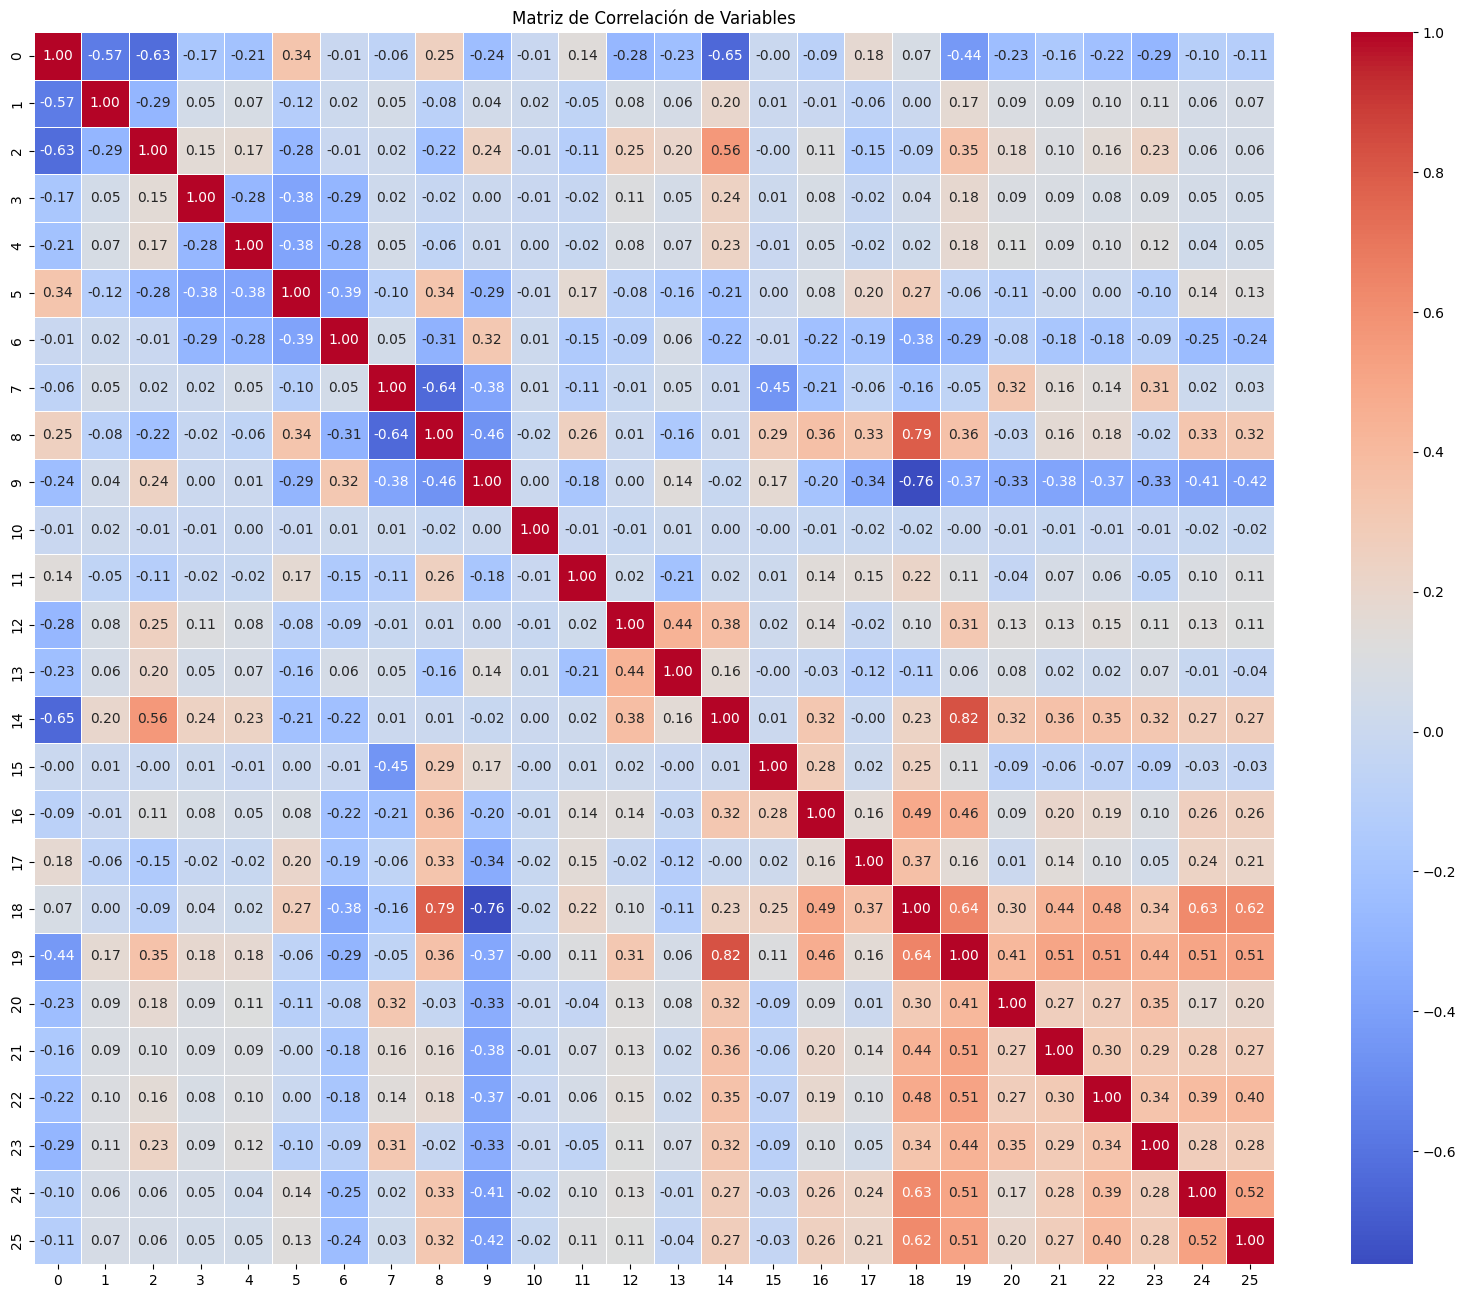

In [488]:
# Ajusta el tamaño del gráfico para que sea legible
plt.figure(figsize=(20, 16))

# Crea el mapa de calor
sns.heatmap(matriz_correlacion,
            annot=True,    # Muestra los valores de correlación en las celdas
            cmap='coolwarm', # Colores que resaltan relaciones positivas y negativas
            fmt=".2f",      # Formato a dos decimales
            linewidths=.5) # Líneas de separación

plt.title('Matriz de Correlación de Variables');

Despúes de obtener la matriz de correlación, nos sentraremos exclusivamente en las correlaciones fuertes que se dan con la variable 'churn', es decir, si los clientes abandonan la empresa.

La correlación positiva más destacada resultó ser:

* 'cuentas_diarias': proporciona una visión más detallada del comportamiento de los clientes a lo largo del tiempo (0.38)

De las correlaciones fuertes negativas destacan:

* 'tenure': meses de contrato del cliente (- 0.35)
* 'contract': tipo de contrato (- 0.39)

###Análisis Dirigido

####Tiempo de contrato × Cancelación


Al estimar dicha relación en el apartado anterior podemos afrimar que existe una correlación negativa, lo cual significa:

* A mayor tiempo de contrato, menor es la probabilidad de que se vaya el cliente
* Es cdecir, clientes que llevan más tiempo con la empresa tienden a quedarse
* Clientes nuevos o con contratos cortos tienden a salirse de la empresa

####Gasto total × Cancelación

La correlación entre las variables es neagativa, aunque de menor intensidad (- 0.19) que la anterior (- 0.35) lo cual quiere decir que:

A mayor gasto total, menor es la probabilidad de que se vaya el cliente

/tmp/ipython-input-1808509059.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='total_charges', data=datos_telecom_2, palette='Set1')


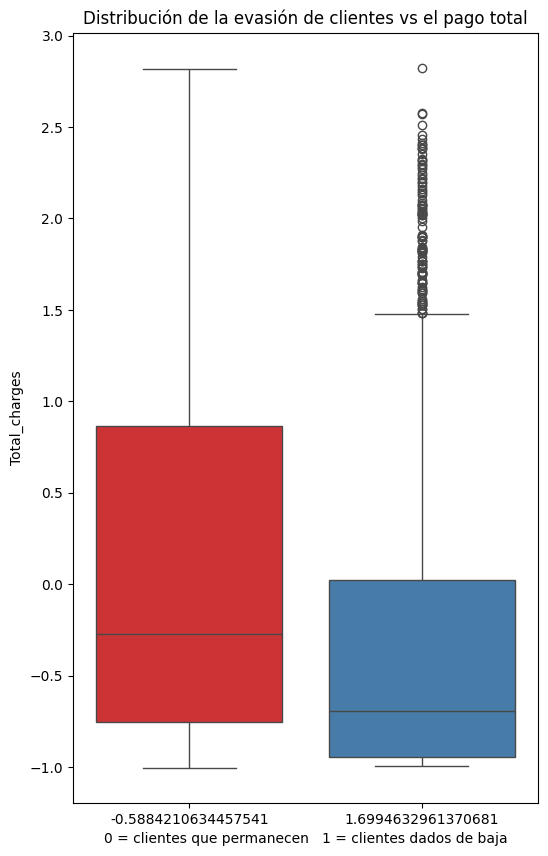

In [441]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 10))
sns.boxplot(x='churn', y='total_charges', data=datos_telecom_2, palette='Set1')
plt.title('Distribución de la evasión de clientes vs el pago total')
plt.xlabel('0 = clientes que permanecen   1 = clientes dados de baja')
plt.ylabel('Total_charges')
plt.show()

El diagrama de caja nos muestra informacion reveladora sobre los clientes que abandonaron la empresa:

* Clientes con el tiempo de contrato  más alto tienden a quedarse en la compañía
* La presencia de outliers es un indicativo de que algunos clientes que se dieron de baja tenían pagos totales altos.

Esto posiblemente podría indicar:

* Cancelaciones por insatisfacción a pesar de la larga permanencia.

##🤖 Modelado Predictivo

###Separación de Datos

####Segmentación de la base de datos (entrenamiento  y prueba)

In [442]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, stratify=y)

###Creación de Modelos

####Modelo de referencia - Baseline

In [443]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.7429829389102917

Árboles de decisión

In [444]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [445]:
modelo_arbol.score(X_test, y_test)

0.724821133736929

In [446]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

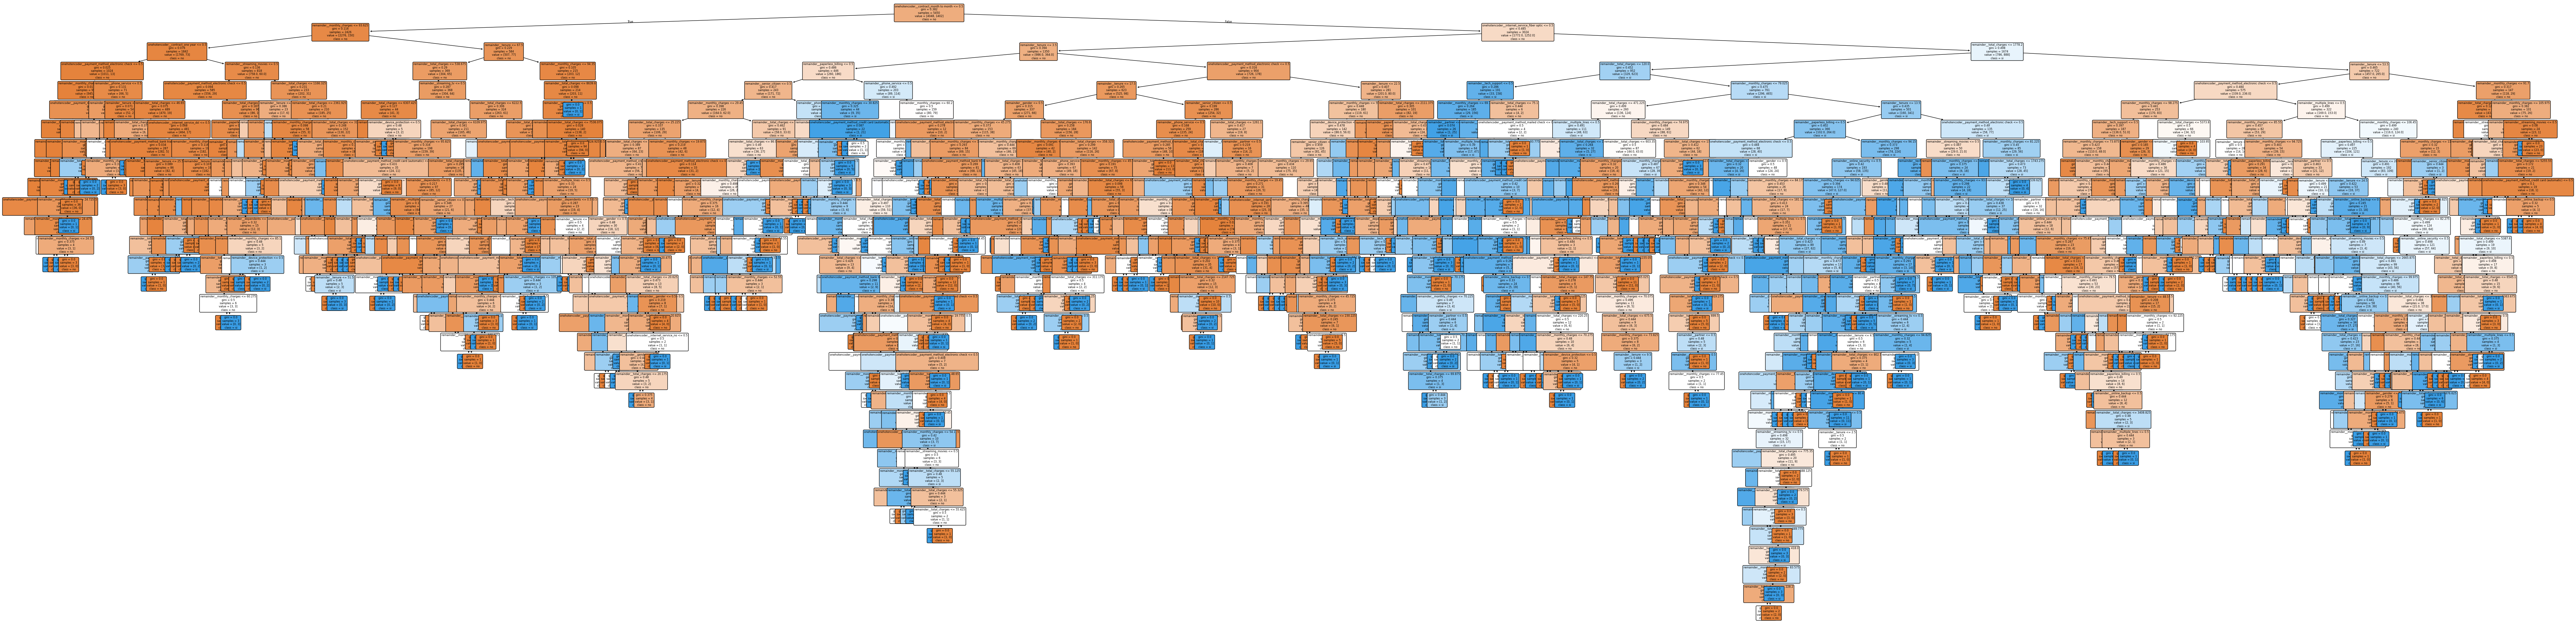

In [447]:
# Visualizar arbol de decision

plt.figure(figsize=(100,25))
plot_tree(modelo_arbol, class_names=['no','si'], fontsize=6, feature_names=one_hot.get_feature_names_out(columnas), filled=True, rounded=True)
plt.show()

In [448]:
modelo_arbol.score(X_train, y_train)

0.9913761467889908

In [449]:
# Parametrizando el árbol de decisión
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=5)

In [450]:
# Obtener puntaje con variables de prueba
modelo_arbol.score(X_test,y_test)

0.775454045129334

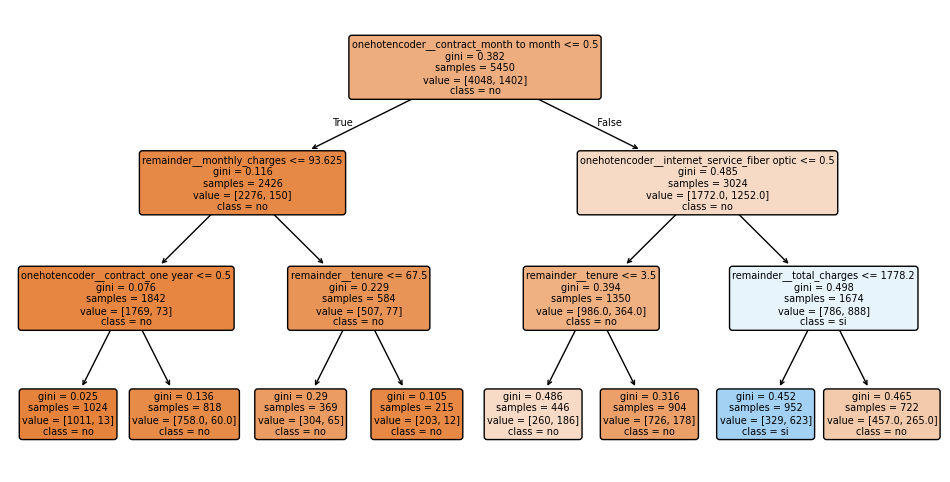

In [451]:
# Visualizar arbol de decision parametrizado

plt.figure(figsize=(12,6))
plot_tree(modelo_arbol, class_names=['no','si'], fontsize=7, feature_names=one_hot.get_feature_names_out(columnas), filled=True, rounded=True)
plt.show()

In [452]:
# Obtener puntaje con variables de entrenamiento
modelo_arbol.score(X_train,y_train)

0.796697247706422

<p align="justify">Como podemos observar, se obtuvo un mejor resultado con respecto al modelo de árbol sin para metrizar, esto se debe a que en el primer caso nuestro modelo se sobreajustó, es decir, se "memorizó" las mediciones entrenadas, por lo que al predecir el comportamiento de un nuevo dato dado, la predicción será erronea.</p>

<p align="justify">Con lo anterior podemos decir que este modelo de árbol parametrizado a una profundidad de 3 niveles, resultó con el mejor desempeño, en comparación con el modelo de referencia o baseline y el modelo de árbol sin parametrizar, por lo que ya obtuvimos nuestro primer modelo de aprendizaje automático.</p>

#####Algoritmo KNN

In [453]:
#instituir el modelo
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [454]:
# Normalizar la X de prueba
X_test_norm = normalizacion.transform(X_test)

In [455]:
modelo_knn.score(X_test_norm, y_test)

0.7429829389102917

<p align="justify">Por lo anterior, podemos afirmar que el modelo del vecino más cercano (KNN) generalizó una forma adecuada. A continuación determinaremos cual de los tres modelos es el que resulta mejor para la predicción de información</p>

In [456]:
# Serialización del modelo
lista = [('dummy', dummy,X_test),('de árbol',modelo_arbol,X_test),('knn',modelo_knn,X_test_norm)]
for i in lista:
  print(f'La exactitud del modelo {i[0]} es: {i[1].score(i[2],y_test)}')

La exactitud del modelo dummy es: 0.7429829389102917
La exactitud del modelo de árbol es: 0.775454045129334
La exactitud del modelo knn es: 0.7429829389102917


Por lo anterior, el modelo de árbol obtuvo el mejor puntaje en este caso en particular, por lo que vamos a proceder a importarlo:

In [457]:
import pickle

In [458]:
with open('modelo_onehotencoder.pkl', 'wb') as archivo:
  pickle.dump(one_hot, archivo)

In [459]:
with open('modelo_champion.pkl', 'wb') as archivo:
  pickle.dump(one_hot, archivo)

###Evaluación de los Modelos

#####Matriz de confusión

In [460]:
# cargando bibliotecas
from sklearn.metrics import confusion_matrix

In [461]:
y_previsto = modelo_arbol.predict(X_test)
matriz_confusion = confusion_matrix(y_test, y_previsto)
print(matriz_confusion)

[[1231  119]
 [ 289  178]]


In [462]:
from sklearn.metrics import ConfusionMatrixDisplay

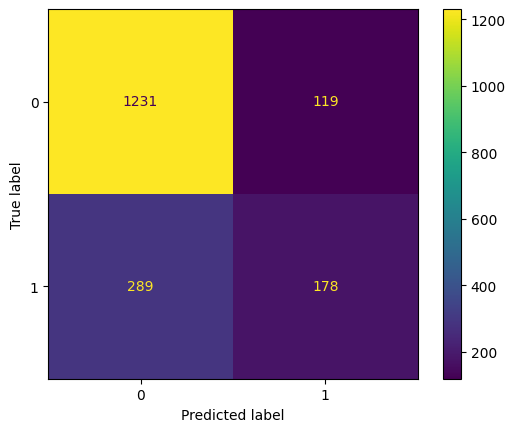

In [463]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)
visualizacion.plot();

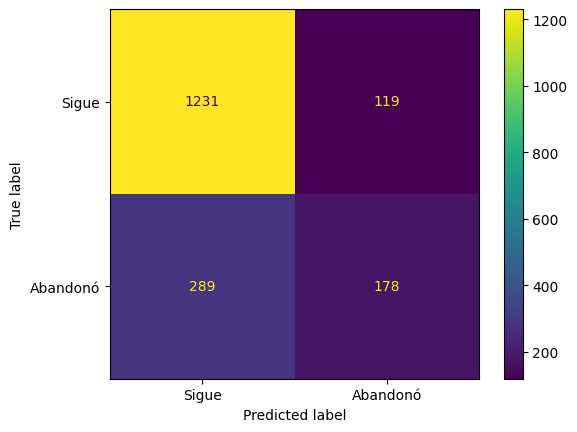

In [464]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['Sigue','Abandonó'])
visualizacion.plot();

<p align="justify">Al analizar la matriz de confusión se puede decir que el modelo predijo que 289 clientes seguían con la empresa, cuando en realidad la abandonaron, lo que indica un falso negativo. También se observa que el modelo estimó que 119 clientes abandonaron la empresa cuando son clientes activos.</p>

<p align="justify">Además el modelo clasificó 178 clientes que salieron de la empresa de manera acertada, e identificó 1231 clientes activos de manera correcta.</p>


* Verdadero Negativo: 1231
* Verdadero positivo: 178
* Falso positivo (Error Tipo 1): 119
* Falso negativo (Error tipo 2): 289

In [465]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [466]:
#Precisión
precision_calc = 178/(178+119)
precision_calc

0.5993265993265994

#####Evaluando el modelo con las métricas: Recall, Accuracy, F1 Score y Precision

In [467]:
print(f'La precisión del modelo es: {precision_score(y_test, y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_test, y_previsto)}')
print(f'La exactitud (Accuracy) del modelo es: {accuracy_score(y_test, y_previsto)}')
print(f'El F1 Score del modelo es: {f1_score(y_test, y_previsto)}')


La precisión del modelo es: 0.5993265993265994
La sensibilidad (Recall) del modelo es: 0.3811563169164882
La exactitud (Accuracy) del modelo es: 0.775454045129334
El F1 Score del modelo es: 0.46596858638743455


Curva ROC (adicional)

In [468]:
from sklearn.metrics import RocCurveDisplay

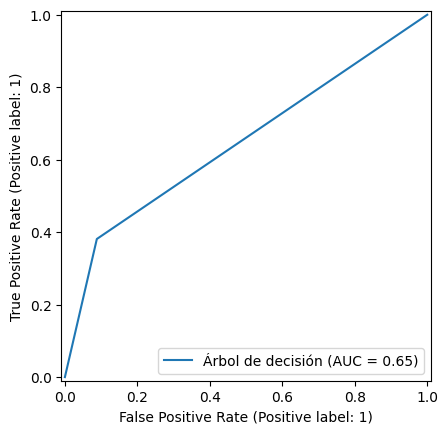

In [469]:
RocCurveDisplay.from_predictions(y_test, y_previsto, name= 'Árbol de decisión');

In [470]:
from sklearn.metrics import roc_auc_score
print(f'El área bajo la curva ROC es: {roc_auc_score(y_test, y_previsto)}')

El área bajo la curva ROC es: 0.6465040843841701


In [471]:
from sklearn.metrics import PrecisionRecallDisplay

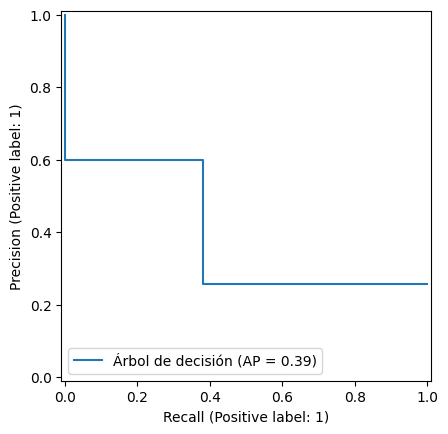

In [472]:
PrecisionRecallDisplay.from_predictions(y_test, y_previsto, name= 'Árbol de decisión');

In [473]:
from sklearn.metrics import average_precision_score
print(f'El score promedio de precision vs recall es: {average_precision_score(y_test, y_previsto)}')

El score promedio de precision vs recall es: 0.3874905039294655


###Informe de métricas

In [474]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1350
           1       0.60      0.38      0.47       467

    accuracy                           0.78      1817
   macro avg       0.70      0.65      0.66      1817
weighted avg       0.76      0.78      0.76      1817



##📋 Interpretación y Conclusiones

###Análisis de la Importancia de las Variables

Del informe anterior se puede decir lo siguiente:

1. Clientes que se quedaron
* Precisión de 0.81: De todas las veces que el modelo predijo que un cliente se quedaría, acertó en un 81% de las ocasiones. Esto es bueno, ya que evitas gastar recursos en clientes que no tienen intención de irse.
* Sensibilidad (Recall) de 0.91: De todos los clientes que se quedaron, el modelo identificó correctamente al 91%. Esto significa que el modelo es excelente para confirmar qué clientes son fieles.

2. Clientes que abandonaron

* Precisión de 0.60: De todas las veces que el modelo señaló a un cliente como "en riesgo de abandono", solo el 60% de esas predicciones fueron correctas. El otro 40% son falsos positivos; es decir, clientes que no tenían intención de irse, pero que el modelo identificó como "en riesgo".
* Sensibilidad (Recall) de 0.38: Este es el dato más crítico. De todos los clientes que realmente abandonaron la empresa, el modelo solo logró identificar al 38%. Esto significa que estás dejando de identificar al 62% de los clientes que se irán.


La información proporcionada indica que el modelo de churn presenta underfitting y overfitting.

1. Underfitting: El modelo no está "capturando" a la mayoría de los clientes que se van. Esto se ve reflejado en su baja sensibilidad (recall) para la clase 1 (clientes que abandonaron). Una sensibilidad de solo 0.38 significa que el modelo solo identifica al 38% de los clientes que realmente abandonan, lo que indica que no ha aprendido las relaciones subyacentes en los datos para esa clase.

2. Overfitting: El modelo presenta una precisión de 0.60 para la clase 1, lo que indica que el 40% de las alertas de "abandono" son incorrectas. Esto sugiere que el modelo se está ajustando demasiado a la clase mayoritaria (clientes que se quedan), y generaliza de manera deficiente al intentar predecir la clase minoritaria (clientes que abandonan), lo que genera falsas alarmas.

En resumen, la combinación de baja sensibilidad y una precisión que podría mejorarse, junto con la incapacidad para identificar a la mayoría de los clientes que se van, es una clara señal de que el modelo no ha aprendido las características de la clase minoritaria de manera efectiva, lo que es un indicio de overfitting en el contexto de un desequilibrio de clases, y underfitting en su capacidad de generalizar para la clase que más interesa.

###Conclusión

<p align="justify">De los tres modelos predictivos generados (dummy, diagrama de arbol, algoritmo KNN (vecino mas cercano), para este caso el que tuvo mejor rendimiento fue el de árbol parametrizado a tres niveles de profundidad.</p>

<p align="justify">Como predictor, el diagrama de árbol tuvo un rendimiento aceptable, pudo identificar con una probabilidad de más del 80% los clientes que se quedaron. Para mejorar la prediccion de dicho modelo se recomienda utilizar variables de validación y realizar metodos de oversampling y undersampling.</p>

<p align="justify">Las variables que tuvieron mayor impacto en el comportamiento de abandono de los clientes fueron; cargos totales altos, el tiempo de contrato. La variable genero no presentó representatividad alguna.</p>

<p align="justify">Las recomendaciones generales a la empresa para minimizar la evasión de los cientes es promover campañas que incentiven la contratación mínimo por un año, al ofreceer campañas con descuento u ofrecer algun servicio de streaming adicional.</p>

<p align="justify">Favorecer el método de pago automatico por medios digitales en los pagos por mes al ofrecer un "precio pronto pago", al ofrecer un descuento del 5-10%.</p>